## Imports

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
sns.set_style("whitegrid")
%matplotlib inline
warnings.filterwarnings('ignore')

## Cargar el dataset

In [2]:
df = pd.read_csv('../data/final/final_data.csv')

Total de reseñas: 26342

Ejemplo de reseña positiva:
yes

Ejemplo de reseña negativa:
grab water bottle got kicked game inactivity even though moving since wasnt engaged combat outside spawn zone game decided kick suspend quickplay give option rejoin match


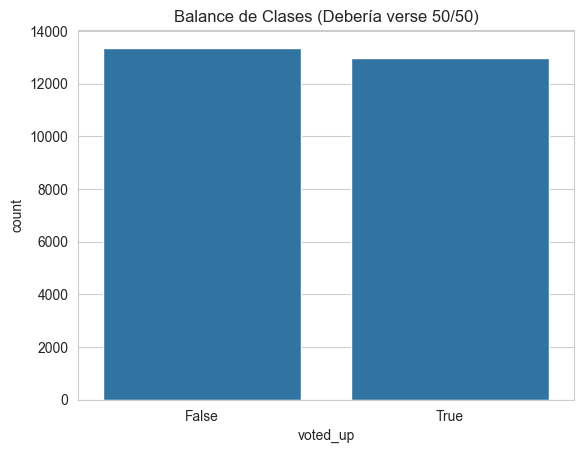

In [3]:
df = df.dropna()

print(f"Total de reseñas: {df.shape[0]}")
print("\nEjemplo de reseña positiva:")
print(df[df['voted_up'] == True].iloc[0]['review_clean'])

print("\nEjemplo de reseña negativa:")
print(df[df['voted_up'] == False].iloc[0]['review_clean'])

# Verificar balance
sns.countplot(x='voted_up', data=df)
plt.title('Balance de Clases (Debería verse 50/50)')
plt.show()

## División de datos

In [4]:
X = df['review_clean']
y = df['voted_up']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Entrenando con: {len(X_train)} reseñas")
print(f"Testeando con: {len(X_test)} reseñas")

Entrenando con: 21073 reseñas
Testeando con: 5269 reseñas


## Entrenamientos y Pipeline

In [13]:
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(dual=False, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=25, n_jobs=-1)
}

res = []

for nombre, modelo in models.items():
    print(f"Entrenando {nombre}...")

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.9)),
        ('clf', modelo)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    res.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    print(f"Accuracy: {acc: .2%}\nPrecision: {prec: .2%}\nRecall: {rec: .2%}\nF1-Score: {f1: .2%}")

Entrenando Naive Bayes...
Accuracy:  86.24%
Precision:  90.20%
Recall:  80.86%
F1-Score:  85.27%
Entrenando Logistic Regression...
Accuracy:  87.17%
Precision:  87.80%
Recall:  85.90%
F1-Score:  86.84%
Entrenando Linear SVM...
Accuracy:  86.51%
Precision:  85.88%
Recall:  86.90%
F1-Score:  86.39%
Entrenando Random Forest...
Accuracy:  83.39%
Precision:  85.28%
Recall:  80.12%
F1-Score:  82.62%


## Evaluación y Métricas


TABLA DE POSICIONES FINAL
                Modelo  Accuracy  Precision    Recall  F1-Score
1  Logistic Regression  0.871702   0.877953  0.859014  0.868380
2           Linear SVM  0.865060   0.858774  0.869029  0.863871
0          Naive Bayes  0.862403   0.902020  0.808552  0.852732
3        Random Forest  0.833934   0.852809  0.801233  0.826216


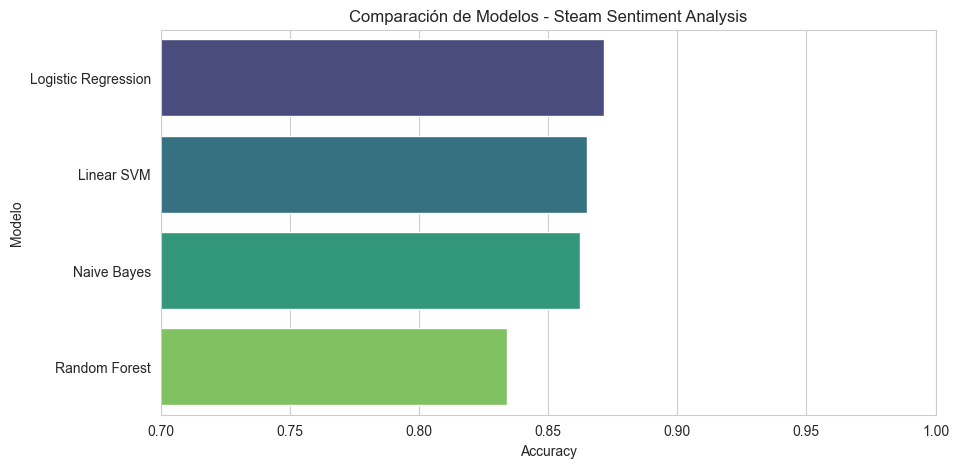

In [19]:
df_resultados = pd.DataFrame(res).sort_values(by="Accuracy", ascending=False)

print("\nTABLA DE POSICIONES FINAL")
print(df_resultados)

# Gráfica de barras
plt.figure(figsize=(10, 5))
sns.barplot(x="Accuracy", y="Modelo", data=df_resultados, palette="viridis")
plt.title("Comparación de Modelos - Steam Sentiment Analysis")
plt.xlim(0.7, 1.0) # Ajustamos el eje X para ver mejor las diferencias
plt.show()

## Guardar Modelo

In [21]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.9)),
    ('clf', LogisticRegression(max_iter=1000))
])

print("Entrenando al modelo...")
model.fit(X_train, y_train)

joblib.dump(model, '../model/model.pkl')
print("Modelo guardado como 'model.pkl'.")

Entrenando al modelo...
Modelo guardado como 'model.pkl'.
